### This notebook contains code and its respective documentation for both the descriptive analytics and hypothesis testing independent project as completed by Meshack Mbonge.

# Descriptive Statistics

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Our solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In order to work on the above problem, we need to do the following:


1.  Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question. 
2.  Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate, bivariate and multivariate analysis recording our observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.

5. Challenge our solution by providing insights on how we can make improvements.

First, let's load the required libraries and the dataset.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset

data = pd.read_csv('financial_inclusion.csv')

# Preview first 3 rows of the dataset
data.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [3]:
# Preview last 3 rows of the dataset
data.tail(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


## 1. Defining the Question

In this analysis, having a bank account is seen as measure of financial inclusion. As such, the variable **Has a Bank account** is going to be our target variable. Using Exploratory Data Analysis (EDA) approached we are going to try to answer the following questions;


**Univariate Analysis**

*   What is the proportion of the observations are recorded as having a bank account vs those without?
*   What is the percentage split in terms on proportions for each on the independent variables?

**Bivariate Analysis**

*   What is the empirical relationship between each of the independent variables and the target variable?

**Multivariate Analysis**

*   How can we reduce the number of variables into a few specific components such that the components successively explain the variability of the dataset?







In [4]:
# Checking the size of the data
print(data.shape)

# Printing out column names
data.columns

(23524, 13)


Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

**Observation:** The dataset contains 23,524 observations/records spread across 13 columns. For the purposes of uniformity and referencing in our code, we shall rename our columns.

In [5]:
# Renaming columns
data.columns = ['country', 'year', 'id','banking_status',
               'location', 'cell_phone', 'household_size', 'age', 'gender', 
               'rship_with_head', 'marital_status', 'education', 'job']

In [6]:
# Checking data types
data.dtypes

country             object
year                 int64
id                  object
banking_status      object
location            object
cell_phone          object
household_size     float64
age                float64
gender              object
rship_with_head     object
marital_status      object
education           object
job                 object
dtype: object

**Observation:** Majority of variables in our dataset are categorical with only *household_size*, *Age* and *year* being numeric. 

Let's check the descriptive statistics of the entire dataset.

In [7]:
data.describe(include='all')

,country,year,id,banking_status,location,cell_phone,household_size,age,gender,rship_with_head,marital_status,education,job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_38,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


From a visual inspection of the data, we see that majority of the respondents;

Don't have bank accounts

*   Don't have bank accounts.
*   Are from Rwanda
*   Live in rural areas
*   Have cell phones
*   Are female
*   Are heads of households and married/living together
*   Are self-employed
*   Have primary education as their highest level of education

Let's investigate the numeric variables abit more by plotting a histogram of each. But first, let's see if the dataset contains missing values

## Checking missing data

In [8]:
# Checking for missing data
data.isna().sum()

country            14
year                0
id                  0
banking_status     36
location           15
cell_phone         11
household_size     28
age                34
gender             34
rship_with_head     4
marital_status     32
education          29
job                30
dtype: int64

Given that the percentage of missing values in each variable is small compared to the entire dataset, we shall remove missing data as employing an imputation strategy might affect the outcomes of our analysis.

For example, if we decide to impute categorical variables with what the the majority of respondents said them we might increase any existing bias.

In [9]:
# Dropping rows with missing data
data.dropna(inplace=True)

# Checking the resulting dimensions of the data
data.shape

(23343, 13)

We are left with 23,357 rows. This is still a significant sample size to analyse. We shall do this by performing EDA i.e answering some questions to understand the data,

The UniqueID column is nothing more but a numbering column. We shall drop it and rely on our default index.

In [10]:
data.drop(['id'], axis=1, inplace=True)

data.head(3)

,country,year,banking_status,location,cell_phone,household_size,age,gender,rship_with_head,marital_status,education,job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


## Univariate Analysis of numerical variables.

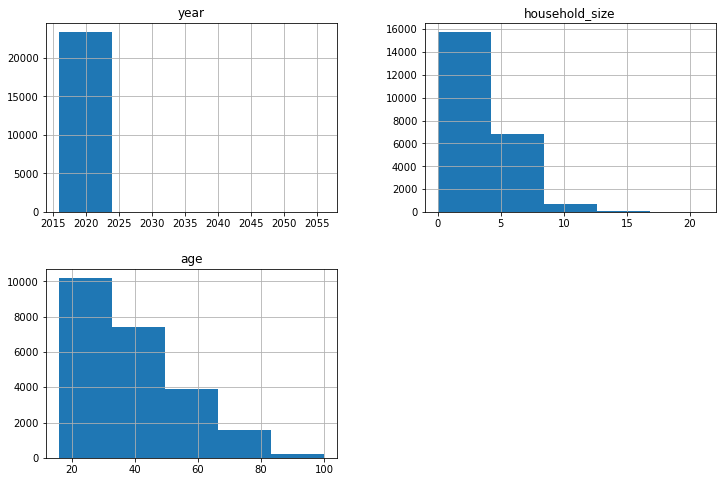

In [11]:
# Histograms of numeric variables
data.hist(bins=5, figsize=(12,8))
plt.show()

In [12]:
# Investigating skewness
from scipy.stats import skew

print('HH Size Skewness:', skew(data['household_size'].dropna()))

print('Age Skewness:', skew(data['age'].dropna()))

HH Size Skewness: 0.9740460873321882
Age Skewness: 0.8406077264066741


*   We see that household size and age are both moderately skewed to the right with their means being greater than the median and mode.
*   Additionally we see the presence few outliers. Lets investigate these using the IQR method and boxplots.

### Detecting Outliers

213     2029
308     2056
7014    2039
Name: year, dtype: int64


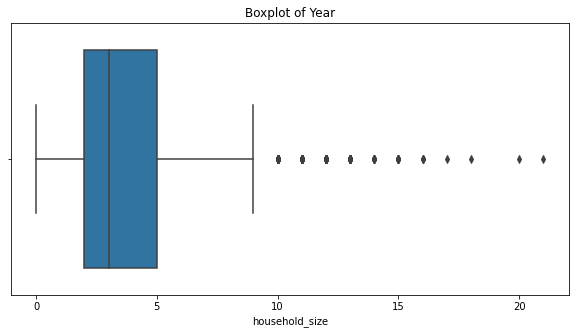

In [13]:
# Finding Outliers in Year

# using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

print(find_outliers_IQR(data['year']))

#using boxplot

plt.figure(figsize=(10,5))
sns.boxplot(x=data['household_size'])
plt.title('Boxplot of Year')
plt.show()

There are 3 outliers in the Year variable. We shall need to remove these as they record information from the future which is most likely an error.

10.0


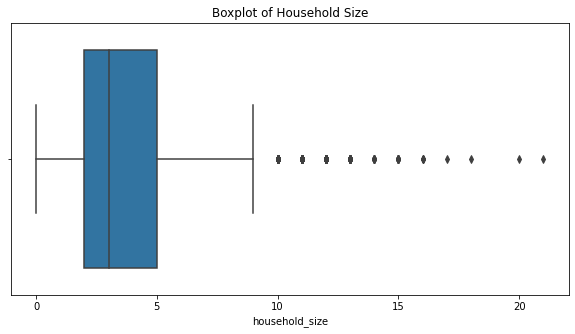

In [14]:
# Finding outliers in Household size

print(find_outliers_IQR(data['household_size']).min())

#using boxplot

plt.figure(figsize=(10,5))
sns.boxplot(x=data['household_size'])
plt.title('Boxplot of Household Size')
plt.show()

The household size variable contains outliers to the right with the cut-off point being observations equal to or greater than 10. However, we shall not remove or impute these outliers as they may a reflection on real world information and removal or imputation may lead to information loss.

84.0


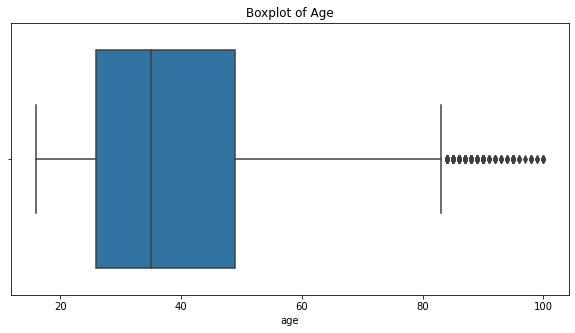

In [15]:
# Finding outliers in Age

print(find_outliers_IQR(data['age']).min())

#using boxplot

plt.figure(figsize=(10,5))
sns.boxplot(x=data['age'])
plt.title('Boxplot of Age')
plt.show()

Similarly, the Age variable contains outliers to the right with the cut-off point being observation equal to or greater than 84yrs. We shall retain these outliers to avoid information loss especially in terms financial inclusion among people of an older age group.

## Univariate analysis of target variable.

Here, we want to investigate how the target variable is distributed across the dataset. We shall use a barplot/countplot to investigate this

No     0.858759
Yes    0.141241
Name: banking_status, dtype: float64


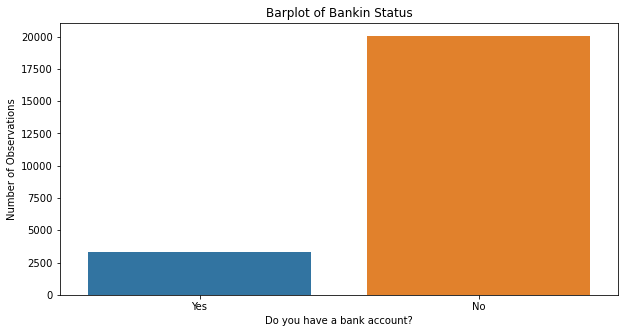

In [16]:
# Proportion of observation with a bank account vs without
print(data['banking_status'].value_counts(normalize=True))

# Countplot of Banking Status
plt.figure(figsize=(10,5))
sns.countplot(x='banking_status', data=data)
plt.title('Barplot of Bankin Status')
plt.xlabel('Do you have a bank account?')
plt.ylabel('Number of Observations')
plt.show()

We see that **86%** of observations are recorded as not having bank accounts while only 14% have bank accounts.

## Bivariate analysis of independent categorical variables.

Rwanda      0.372017
Tanzania    0.278456
Kenya       0.259778
Uganda      0.089749
Name: country, dtype: float64


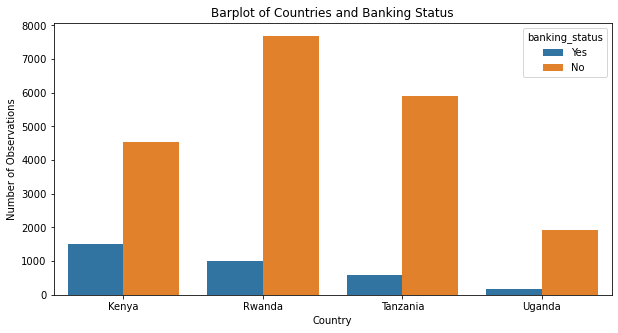

In [17]:
# Proportion of observations from different countries
print(data['country'].value_counts(normalize=True))

# Countplot of Country
plt.figure(figsize=(10,5))
sns.countplot(x='country', data=data, hue='banking_status')
plt.title('Barplot of Countries and Banking Status')
plt.xlabel('Country')
plt.ylabel('Number of Observations')
plt.show()

 - Observations recorded in Rwanda make up the majority of observations at 37% with Uganda being the least represented country at only 9%. Addionally, number of people with bank accounts is higher in Kenya and Rwanda compared to Tanzania and Uganda.

Rural    0.611061
Urban    0.388939
Name: location, dtype: float64


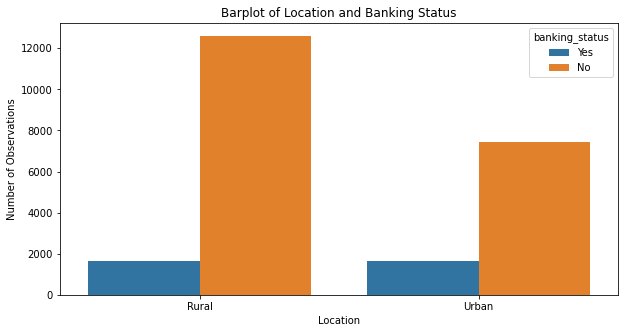

In [18]:
# Proportion of observations from different location categories
print(data['location'].value_counts(normalize=True))

# Countplot of Location
plt.figure(figsize=(10,5))
sns.countplot(x='location', data=data, hue='banking_status')
plt.title('Barplot of Location and Banking Status')
plt.xlabel('Location')
plt.ylabel('Number of Observations')
plt.show()



*   61% of observations were recorded among people living in rural areas and 39% from urban areas. Additionally, the
 proportion on people with bank accounts living in urban areas is slightly higher than in and rural areas.



Yes    0.742578
No     0.257422
Name: cell_phone, dtype: float64


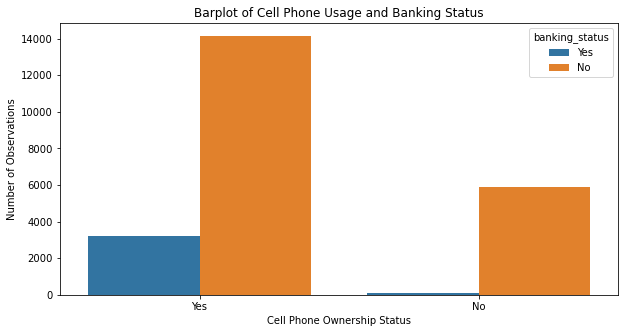

In [19]:
# Proportion of observations with cell phones vs without
print(data['cell_phone'].value_counts(normalize=True))

# Countplot of Cell Phone Ownership
plt.figure(figsize=(10,5))
sns.countplot(x='cell_phone', data=data, hue='banking_status')
plt.title('Barplot of Cell Phone Usage and Banking Status')
plt.xlabel('Cell Phone Ownership Status')
plt.ylabel('Number of Observations')
plt.show()



*  74% of observation were recorded from people with cellphones and 26% from those without. A significant proportion of people with mobile phones have bank accounts compared to those without mobile phones.



Female    0.58977
Male      0.41023
Name: gender, dtype: float64


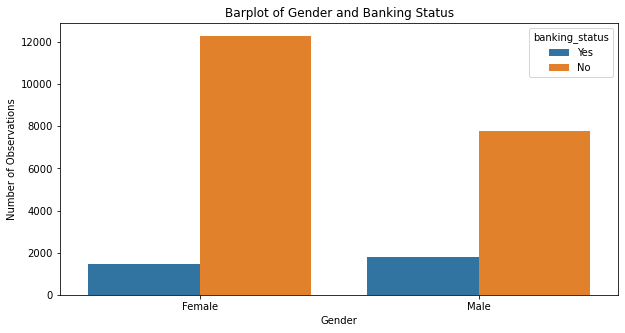

In [20]:
# Proportion of observations from different genders
print(data['gender'].value_counts(normalize=True))

# Countplot of Gender
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=data, hue='banking_status')
plt.title('Barplot of Gender and Banking Status')
plt.xlabel('Gender')
plt.ylabel('Number of Observations')
plt.show()



*   59% of observations were recorded among males and 41% among females. In terms of having bank accounts, there is a slight diffence between male and females with bank accounts with the former being slightly higher.



Head of Household      0.545345
Spouse                 0.277214
Child                  0.095146
Parent                 0.045795
Other relative         0.028403
Other non-relatives    0.008097
Name: rship_with_head, dtype: float64


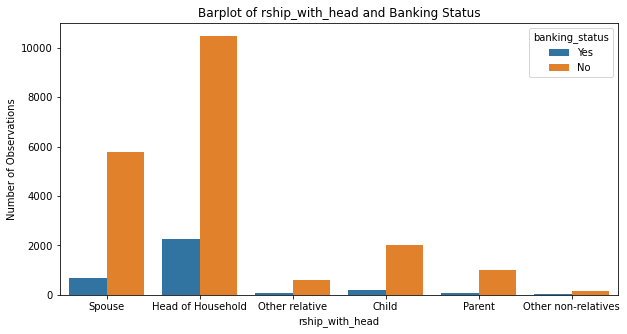

In [21]:
# Proportion of observations by relationship with the head of the household
print(data['rship_with_head'].value_counts(normalize=True))

# Countplot of rship_with_head
plt.figure(figsize=(10,5))
sns.countplot(x='rship_with_head', data=data, hue='banking_status')
plt.title('Barplot of rship_with_head and Banking Status')
plt.xlabel('rship_with_head')
plt.ylabel('Number of Observations')
plt.show()



*   55% of observations were recorded amond heads of households while 28% were recorded among spouses. Heads of household and spouse constitute the majority of bank account holders compared to children, parents, relatives and non-relatives.

*   Generally, heads of households are seen to be the majority on bank account holders in our dataset.







Married/Living together    0.458382
Single/Never Married       0.338560
Widowed                    0.114938
Divorced/Seperated         0.087778
Dont know                  0.000343
Name: marital_status, dtype: float64


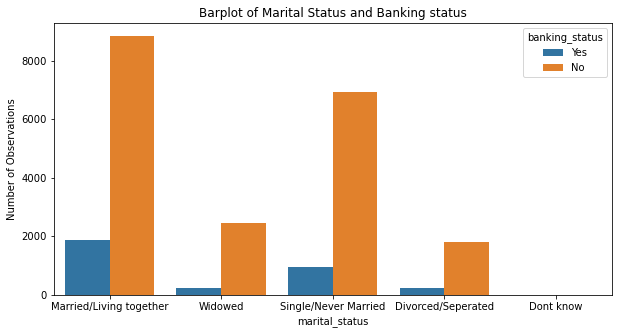

In [22]:
# Proportion of observations by marital status
print(data['marital_status'].value_counts(normalize=True))

# Countplot of rship_with_head
plt.figure(figsize=(10,5))
sns.countplot(x='marital_status', data=data, hue='banking_status')
plt.title('Barplot of Marital Status and Banking status')
plt.xlabel('marital_status')
plt.ylabel('Number of Observations')
plt.show()



*   46% of observations were recorded among married or people living together while 34% of observation among single people. Additionally, the proportion on people with bank accounts is higher among those who are married or living together compared to the rest of the categories.



Primary education                  0.543589
No formal education                0.191364
Secondary education                0.180225
Tertiary education                 0.049008
Vocational/Specialised training    0.034314
6                                  0.001157
Other/Dont know/RTA                0.000343
Name: education, dtype: float64


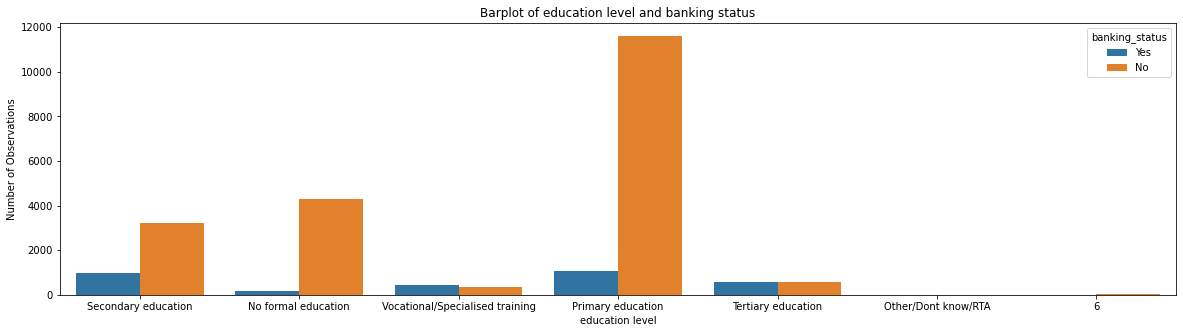

In [23]:
# Proportion of observations by education level
print(data['education'].value_counts(normalize=True))

# Countplot of education level
plt.figure(figsize=(20,5))
sns.countplot(x='education', data=data, hue='banking_status')
plt.title('Barplot of education level and banking status')
plt.xlabel('education level')
plt.ylabel('Number of Observations')
plt.show()



*   54% of observations were recorded among people with Primary school level education as their highest level of education while 19% have no formal education. Additionally, people with primary and secondary education as their highest level of education constitute the majority of those with bank accounts compared to those with tertiary, vocational or no formal education. 



Self employed                   0.272501
Informally employed             0.237759
Farming and Fishing             0.232275
Remittance Dependent            0.107484
Other Income                    0.046138
Formally employed Private       0.044896
No Income                       0.026475
Formally employed Government    0.016536
Government Dependent            0.010581
Dont Know/Refuse to answer      0.005355
Name: job, dtype: float64


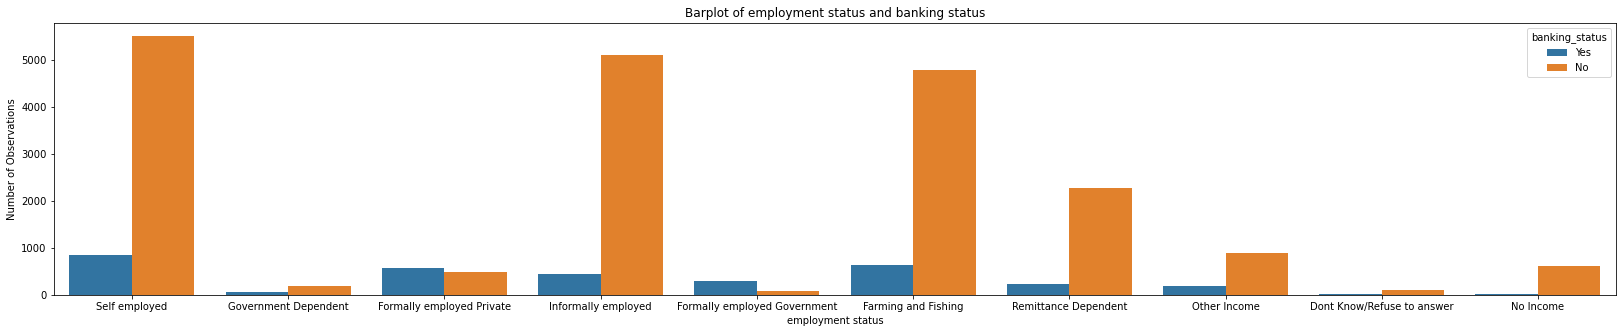

In [24]:
# Proportion of observations by employment status
print(data['job'].value_counts(normalize=True))

# Countplot of employment status
plt.figure(figsize=(28,5))
sns.countplot(x='job', data=data, hue='banking_status')
plt.title('Barplot of employment status and banking status')
plt.xlabel('employment status')
plt.ylabel('Number of Observations')
plt.show()



*   With the exception of those formally employed in the private sector, majority of recorded observations indicated that people have no access to bank accounts regardless of their employment status.

* Morever, self-employed people constitute the majority of the recorded observations, followed by informally employed and those engaged in farming and fishing respectively.




## Multivariate Analysis

**Principal Component Analysis (PCA)**

PCA is a dimensionality reduction technique that is used to transform large datasets into a smaller number of variables that explain most of the variability in the said dataset.

It does this by going through the following steps; 

**a.** Standardizing the variables so that each variable contributes equally to the analysis by transforming them into the same scale. This step is very important and PCA is very sensitive to variances sucha that if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges.

**b.** Calculates the covariance of each variable to understand how the input variables relate with each other. 

**c.** Computes eigenvectors and eigenvalues which give amount of variance carried in each Principal Component.

**d.** Form a feature vector which we shall use to decide how many features we shall use given the degree to which each feature explains the variability of the dataset.


The features in our dataset are all categorical. PCA will only be possible if we have numerical values. As such we shall start by converting our categorical features to numeric form.

In [25]:
# Transforming Year to categorical values

data['year'] = data['year'].astype(str)

In [26]:
# Creating a subset of the dataste with all categotical variables
categoricals = data[['year', 'country', 'location', 'cell_phone', 'gender', 
                     'rship_with_head', 'marital_status', 'education', 'job']]

# Creating a subset of the data with the numerical variables
numericals = data[['age', 'household_size']]

# Defining our target variable
target = data['banking_status']


# Creating a final dataset of the transformed numerical features

features = pd.concat([numericals, pd.get_dummies(categoricals)], axis=1)

# Previewing our features
features.head()


,age,household_size,year_2016,year_2017,year_2018,year_2029,year_2039,year_2056,country_Kenya,country_Rwanda,...,job_Dont Know/Refuse to answer,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed
0,24.0,3.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,70.0,5.0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,26.0,5.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,34.0,5.0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,26.0,8.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


Let's also encode out target features to be 1 for yes and 0 for No

In [27]:
target.replace({'Yes': 1, 'No' : 0}, inplace=True)

In [28]:
# Splitting the data into train and test

# spliting data to test and train

from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.4, random_state=0)

In [29]:
# Normalizing the data

from sklearn.preprocessing import StandardScaler

# Inititializing the scaler
sc = StandardScaler()

# Transforming training ans testing features into normalized features
train_features = sc.fit_transform(train_features)
test_features = sc.transform(test_features)

In [30]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
train_features = pca.fit_transform(train_features)
test_features = pca.transform(test_features)

In [31]:
# Finding the Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_

# Rounded variance ratios for better understading

explained_variance = np.round_(explained_variance, decimals=9)

print(len(explained_variance))

print(sum(explained_variance))

explained_variance

46
1.0000000020000002


array([0.11685705, 0.07532362, 0.06758418, 0.06327118, 0.04898664,
       0.04302667, 0.03776368, 0.03357313, 0.03270819, 0.03059703,
       0.02781445, 0.02588305, 0.02461528, 0.02414992, 0.02355946,
       0.02317791, 0.02306585, 0.02264739, 0.02252369, 0.02228036,
       0.02211288, 0.02193322, 0.02159935, 0.02055971, 0.0197501 ,
       0.01896649, 0.01778521, 0.01447317, 0.01330235, 0.01111384,
       0.01053311, 0.01012754, 0.00833429, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

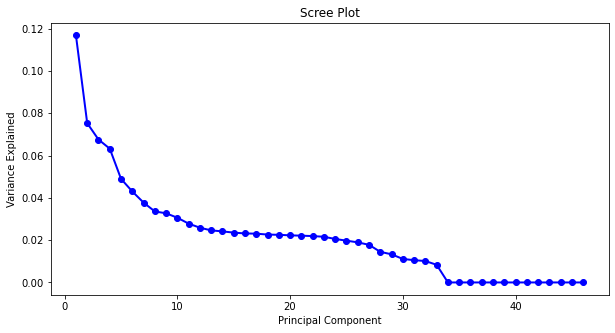

In [32]:
# plotting a scree plot
plt.figure(figsize=(10,5))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

From the explained variance ratios above, amount of variance explained by each pricipal component. We can see that the first component explains 11.69% of the variance in the dataset, the second 7.53% and so on and so forth. Summed together the total explained variance is equal to 1.

We need find the number of components that would explain at least 90% of the variance.

In [33]:
total=0
count=0
for i in pca.explained_variance_ratio_:
    total+=i
    if total<=0.9:
        count+=1
    else:
        break

count

25

We see that we need 25 principal components to explain 90% of the variance. We can take these 25 and try to predict the target variable. This will help us identify whether 25 is an optimal number of pricipal components by assessing the resulting confusion matrix

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
train_features = pca.fit_transform(train_features)
test_features = pca.transform(test_features)

# Let's test using a random forest classifier

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=25, random_state=0)
classifier.fit(train_features, train_target)

# Predicting the Test set results
predicted_targets = classifier.predict(test_features)

# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(test_target, predicted_targets)
print(cm)
print('Accuracy' , accuracy_score(test_target, predicted_targets))

[[7574  446]
 [ 825  493]]
Accuracy 0.8638894838295138


We see that using 25 principal components, the random forest is able to correctly predict 8,067 of 9,338 instances resulting to a 86.39% accuracy.

This is good and we can say that we can use 25 principal components to explain the total variability of the data.

Let's try with 30 components

In [35]:
# Split into train and test data
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.3, random_state=0)

sc = StandardScaler()
train_features = sc.fit_transform(train_features)
test_features = sc.transform(test_features)

pca = PCA(n_components=30)
train_features = pca.fit_transform(train_features)
test_features = pca.transform(test_features)

# With 30 principal components the classification accuracy should gain increase
classifier = RandomForestClassifier(max_depth=30, random_state=0)
classifier.fit(train_features, train_target)

# Predicting the Test set results
predicted_targets = classifier.predict(test_features)

cm = confusion_matrix(test_target, predicted_targets)
print(cm)
print('Accuracy' , accuracy_score(test_target, predicted_targets))

[[5656  336]
 [ 641  370]]
Accuracy 0.8604883621305155


**Conclusion:** Our test accuracy reduced with 30 components. Therefore we can say that 25 components are reliable in explaining the variability of the data and predicting the dependent variable with a reliable accuracy score.

# Hypothesis Testing

We have been tasked to understand electric car usag. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. The selected periods of interest can be either weekdays or weekends but not a mix of both. 

To work on this project, we will perform the following analysis with Python; 

* Find and deal with outliers, anomalies, and missing data within the dataset.
* Plot appropriate univariate and bivariate summaries recording our observations.
* Implement the solution by performing hypothesis testing.

This will need to be documented when writing the report. 

In [36]:
# Importing Dataset
df= pd.read_csv('autolib_daily_events_postal_code.csv')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [37]:
# Checking the size of the data

df.shape

(16085, 13)

Our dataset contains 16,085 records spread across 13 columns. Let's check what types of data it contains.

In [38]:
# Checking datatypes
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

Our dataset consists of mainly numerical data with only date and day_type being categorical. Let's check some descriptive statistics

In [39]:
df.describe(include='all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2/23/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


Our analysis will focus on the number of Blue cars taken in the different regions within the countries as well as on specific days of the week.

To successfully do this we shall need to clean the categorize the post codes to areas using the first two numbers of the postal code provided. That is the postal code starts with 75... we call that Area 75 etc

In [42]:
# first convert postal code column to object types

df['Postal code'] = df['Postal code'].astype(str)

# Initialize an empty list
Area_Code = []


# Loop through postal codes, get the first 2 digits and append to the empyt list.
for post in df['Postal code']:
  codes = post[:2]
  Area_Code.append(codes)
    
    
# Create a new column 'Area_Code' with the values in the Area_code list
df['Area_Code'] = Area_Code

# Preview first 10 rows of the dataset

df.head(10)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Area_Code
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20,75
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22,75
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27,75
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21,75
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20,75
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35,75
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34,75
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15,75
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15,75
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22,75


**Our Hypothesis** 

**H0:** The average number of Blue Cars taken in areacode 75 on weekdays is the same as that taken on all other area codes.

**H1:** The average number of Blue Cars taken in areacode 75 on weekdays is different than that taken in all other area codes.

The logic behind both null and alternate hypothesis is that area code 75 covers the main business district and thus our alternate hypothesis is that there's a difference in average number of blue cars taken in that area vs other areas.

It will be a two tailed test with a concifidence level of 5%

To do this we need to take 2 random samples from area 75 and other areas of n=1000 each, create a dataframe of the sample data and calculate their differences.

In [44]:
# Filtering Area code 75, weekday  data from the dataset

area_75 = df[df['Area_Code'] == '75']
weekdays_area_75 = area_75[area_75['day_type'] == 'weekday']
print(weekdays_area_75.shape)
weekdays_area_75.head(3)

(2463, 14)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Area_Code
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20,75
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22,75
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27,75


In [45]:
# creating a new df with other areas

other_areas = df[df['Area_Code'] != '75']
weekdays_other_areas = other_areas[other_areas['day_type'] == 'weekday']
print(weekdays_other_areas.shape)
weekdays_other_areas.head(3)

(9081, 14)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Area_Code
3431,78000,1/1/2018,1440,0,weekday,71,56,2,2,4,4,0,0,78
3432,78000,1/2/2018,1438,1,weekday,24,21,2,2,1,0,0,0,78
3433,78000,1/3/2018,1439,2,weekday,43,49,0,0,1,3,0,0,78


In [46]:
# Sampling from each dataset

sample_75_weekdays = weekdays_area_75['BlueCars_taken_sum'].sample(1000).tolist()
sample_other_areas_weekdays = weekdays_other_areas['BlueCars_taken_sum'].sample(1000).tolist()

In [47]:
# Creating a dataframe of the two samples.
sample_data = {'BlueCars_taken_Area_75':sample_75_weekdays,'BlueCars_taken_Other_Areas':sample_other_areas_weekdays}
sample_df = pd.DataFrame(sample_data)
sample_df.head()

,BlueCars_taken_Area_75,BlueCars_taken_Other_Areas
0,5,59
1,288,25
2,409,39
3,189,118
4,178,65


Next, we calculate the difference of the two columns

In [48]:
# Creating a new column of differences

sample_df['Difference_BlueCars_Taken'] = sample_df['BlueCars_taken_Area_75'] - sample_df['BlueCars_taken_Other_Areas']
sample_df.head()

,BlueCars_taken_Area_75,BlueCars_taken_Other_Areas,Difference_BlueCars_Taken
0,5,59,-54
1,288,25,263
2,409,39,370
3,189,118,71
4,178,65,113


In [49]:
# Testing for normality of the distribution of the difference

from scipy.stats import shapiro

stat, p = shapiro(sample_df['Difference_BlueCars_Taken'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.979, p=0.000
Sample does not look Gaussian (reject H0)


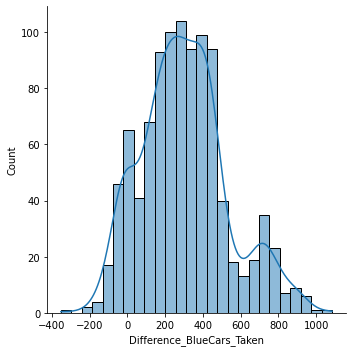

In [52]:
# Verifying distribution using a distplot
sns.displot(sample_df['Difference_BlueCars_Taken'], kde=True)

Given that our data failed the normality test, we shall use the nonparametric Mann–Whitney U test.

In [54]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(sample_df['BlueCars_taken_Area_75'], sample_df['BlueCars_taken_Other_Areas'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Initialize alpha
a = 0.05

if p > alpha:
    print('On average, BlueCars taken in area 75 on weekdays are the same as BlueCars taken in other areas on weekdays (fail to reject H0)')
else:
    print('On average, BlueCars taken in area 75 on weekdays are the Different from BlueCars taken in other areas on weekdays (reject H0)')

Statistics=108239.000, p=0.000
On average, BlueCars taken in area 75 on weekdays are the Different from BlueCars taken in other areas on weekdays (reject H0)


**Conclusion:** As the p-value obtained from the test is lower than alpha, **we reject the null hypothesis.** As such we can conlude the data does not provide enough statistical evidence for us to say that the nyumber blue cars taken in area code 75 are the same as the number of blue cars taken in area other area codes. 